In [14]:
import csv
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset file
file = pd.read_csv(r"C:\Users\shain\OneDrive\Desktop\year3Sem2\Big Data Analytics\UsedCarDataset.csv")

#remove rows with null values
cleanedFile = file.dropna()

#remove duplicate rows
cleanedFile = file.drop_duplicates()

condition = cleanedFile['condition'].tolist()
mileage = cleanedFile['odometer'].tolist()
marketValue = cleanedFile['mmr'].tolist()

#create dataframe
df = pd.DataFrame({
    'Condition': condition,
    'Mileage': mileage,
    'MarketValue': marketValue
})

#pairwise corr matrix
corrMatrix = df.corr()
print(corrMatrix)

             Condition   Mileage  MarketValue
Condition     1.000000 -0.318188     0.281415
Mileage      -0.318188  1.000000    -0.588113
MarketValue   0.281415 -0.588113     1.000000


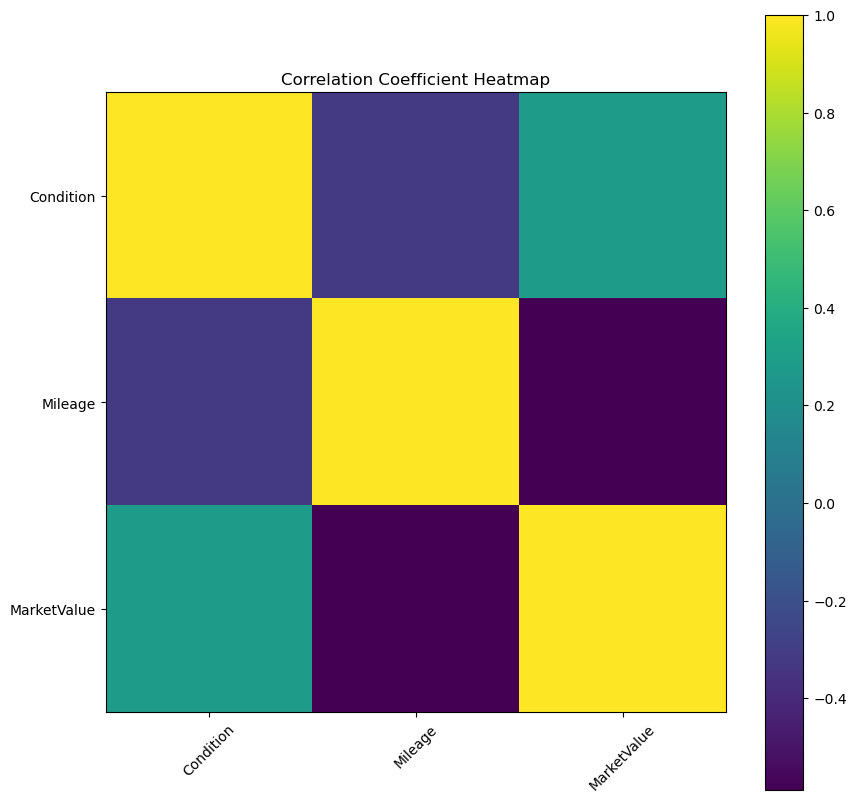

In [16]:
#code to generate heatmap for pairwise correlation
plt.figure(figsize=(10, 10))
heatmap = plt.matshow(corrMatrix, cmap='viridis', fignum=1)
plt.colorbar(heatmap)
plt.xticks(range(len(corrMatrix.columns)), corrMatrix.columns, rotation=45)
plt.yticks(range(len(corrMatrix.columns)), corrMatrix.columns)
plt.gca().xaxis.tick_bottom()  # Move x-axis ticks to bottom
plt.title('Correlation Coefficient Heatmap')
plt.show()

A heatmap gives a visual representation of the pairwise correlation of the variables. From the above heatmap we can see:
- Condition and Mileage have a weak negative correlation which means that a higher Mileage will have a lower Condition
- Condition and Market Value have a weak positive correlation which means that a higher Condition will have a higher Market Value
- Mileage and Market Value have a fairly strong negative correlation which means that a higher Mileage will result in a lower Market Value

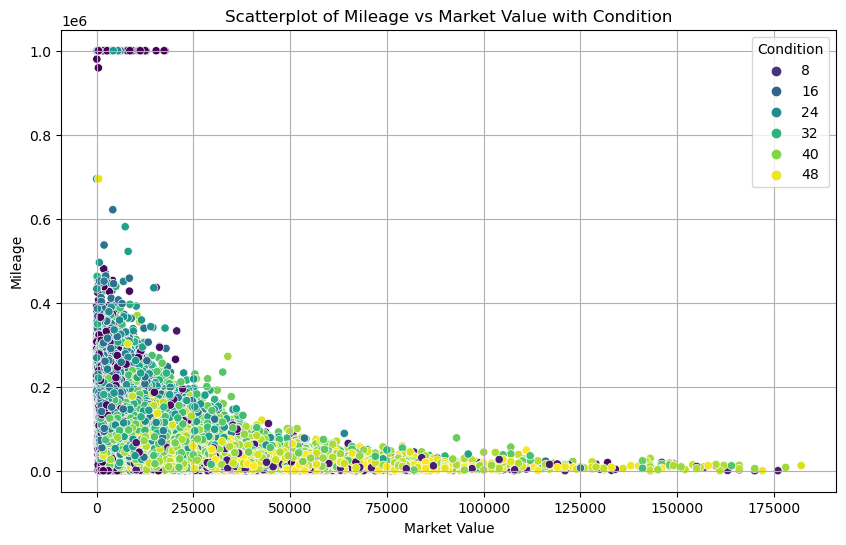

In [13]:
#code to create and output scatterplot of {Mileage, Condition} vs MarketValue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleanedFile, x='mmr', y='odometer', hue='condition', palette='viridis')
plt.xlabel('Market Value')
plt.ylabel('Mileage')
plt.title('Scatterplot of Mileage vs Market Value with Condition')
plt.legend(title='Condition')
plt.grid(True)
plt.show()

From this scatterplot we can see that 
- Cars with a high mileage and a low condition have a low market value
- Cars with low mileages and low conditions have a high market value

STANDARD DEVIATION OF MARKET VALUE AND SELLING PRICE

In [18]:
#add marketValue to df
sellingPrice = cleanedFile['sellingprice'].tolist()

df = pd.DataFrame({
    'Condition': condition,
    'Mileage': mileage,
    'MarketValue': marketValue,
    'SellingPrice': sellingPrice
})

#create an empty list to store the differences
priceDiff = []

#iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Calculate the difference between 'mmr' and 'selling price' for the current record
    diff = row['SellingPrice'] - row['MarketValue']
    # Append the difference to the list
    priceDiff.append(diff)

#convert the list of differences to a Series
priceDiffSeries = pd.Series(priceDiff)

#find the mean of the differences
meanDiff = priceDiffSeries.mean()

#find the standard deviation
stdDevDiff = priceDiffSeries.std()

#output formatted to 2 dp
print(f"Mean of differences: {meanDiff:.2f}")
print(f"Standard deviation of differences: ${stdDevDiff:.2f}")

Mean of differences: -158.02
Standard deviation of differences: $1758.94
